In [1]:
import numpy as np
import pandas as pd

# 입력 변수
total_satellites = int(input("전체 위성 수를 입력하세요: "))
num_planes = int(input("궤도 평면의 수를 입력하세요: "))
altitude = float(input("위성의 고도(km)를 입력하세요: "))
inclination = float(input("궤도 경사각(도)을 입력하세요: "))

# 각 궤도 평면에 배치될 위성 수 계산
satellites_per_plane = total_satellites // num_planes
remaining_satellites = total_satellites % num_planes

# 각 궤도 평면의 오른경각(Ascending Node) 계산
raan_list = np.linspace(0, 360, num_planes, endpoint=False)

# 결과를 저장할 리스트
satellite_data = []

for i, raan in enumerate(raan_list):
    # 이 평면에 배치될 위성 수
    num_satellites_in_plane = satellites_per_plane + (1 if i < remaining_satellites else 0)
    
    # 위성들의 궤도 위치 (0~360도 사이)
    anomalies = np.random.uniform(0, 360, num_satellites_in_plane)
    
    for anomaly in anomalies:
        # 궤도 요소를 사용하여 위도와 경도 계산
        # 단순화를 위해 지구를 완전한 구로 가정
        # 위도 계산
        latitude = np.arcsin(np.sin(np.radians(inclination)) * np.sin(np.radians(anomaly)))
        latitude = np.degrees(latitude)
        
        # 경도 계산
        longitude = raan + np.arctan2(
            np.cos(np.radians(inclination)) * np.sin(np.radians(anomaly)),
            np.cos(np.radians(anomaly))
        )
        longitude = (longitude + 360) % 360  # 0~360도 사이로 조정
        
        satellite_data.append({
            '위도': latitude,
            '경도': longitude,
            '궤도 평면 번호': i+1
        })

# 데이터프레임으로 결과 출력
df = pd.DataFrame(satellite_data)
print(df)


전체 위성 수를 입력하세요:  1600
궤도 평면의 수를 입력하세요:  32
위성의 고도(km)를 입력하세요:  560
궤도 경사각(도)을 입력하세요:  53


             위도          경도  궤도 평면 번호
0     23.109452    0.327382         1
1     -5.553478  359.926665         1
2    -39.386508  357.525468         1
3     40.486403    2.442809         1
4     26.690620    2.753046         1
...         ...         ...       ...
1595  44.583302  349.587052        32
1596  32.234935  351.396424        32
1597  52.638285  350.159214        32
1598   8.019426  351.785227        32
1599  51.486028  350.648223        32

[1600 rows x 3 columns]


전체 위성 수를 입력하세요:  1600
궤도 평면의 수를 입력하세요:  32
위성의 고도(km)를 입력하세요:  560
궤도 경사각(도)을 입력하세요:  58


             위도          경도  궤도 평면 번호
0     57.936156    1.500424         1
1     47.911842    2.377553         1
2     43.076754    2.517616         1
3      5.844653    0.064008         1
4    -33.829616  357.290510         1
...         ...         ...       ...
1595  28.684906  351.542663        32
1596  38.097178  349.261987        32
1597  16.576159  351.704505        32
1598   7.510122  348.832471        32
1599   2.484768  348.777119        32

[1600 rows x 3 columns]


C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44452 (\N{HANGUL SYLLABLE GWE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-pack

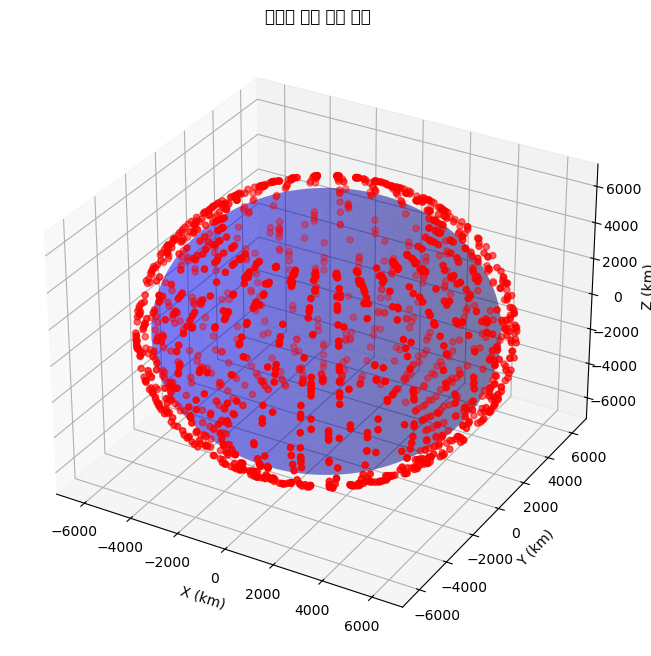

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 입력 변수
total_satellites = int(input("전체 위성 수를 입력하세요: "))
num_planes = int(input("궤도 평면의 수를 입력하세요: "))
altitude = float(input("위성의 고도(km)를 입력하세요: "))
inclination = float(input("궤도 경사각(도)을 입력하세요: "))

# 지구 반지름 (km)
earth_radius = 6371

# 각 궤도 평면에 배치될 위성 수 계산
satellites_per_plane = total_satellites // num_planes
remaining_satellites = total_satellites % num_planes

# 각 궤도 평면의 오른경각(RAAN) 계산
raan_list = np.linspace(0, 360, num_planes, endpoint=False)

# 결과를 저장할 리스트
satellite_data = []

for i, raan in enumerate(raan_list):
    # 이 평면에 배치될 위성 수
    num_satellites_in_plane = satellites_per_plane + (1 if i < remaining_satellites else 0)
    
    # 위성들의 궤도 위치 (0~360도 사이)
    anomalies = np.random.uniform(0, 360, num_satellites_in_plane)
    
    for anomaly in anomalies:
        # 궤도 요소를 사용하여 위도와 경도 계산
        # 위도 계산
        latitude = np.arcsin(np.sin(np.radians(inclination)) * np.sin(np.radians(anomaly)))
        latitude_deg = np.degrees(latitude)
        
        # 경도 계산
        longitude = raan + np.arctan2(
            np.cos(np.radians(inclination)) * np.sin(np.radians(anomaly)),
            np.cos(np.radians(anomaly))
        )
        longitude_deg = (longitude + 360) % 360  # 0~360도 사이로 조정
        
        # 위성과 지구 중심까지의 거리 (반지름)
        radius = earth_radius + altitude
        
        # 구면 좌표를 카르테시안 좌표로 변환
        x = radius * np.cos(np.radians(latitude_deg)) * np.cos(np.radians(longitude_deg))
        y = radius * np.cos(np.radians(latitude_deg)) * np.sin(np.radians(longitude_deg))
        z = radius * np.sin(np.radians(latitude_deg))
        
        satellite_data.append({
            '위도': latitude_deg,
            '경도': longitude_deg,
            '궤도 평면 번호': i+1,
            'X': x,
            'Y': y,
            'Z': z
        })

# 데이터프레임으로 결과 저장
df = pd.DataFrame(satellite_data)
print(df[['위도', '경도', '궤도 평면 번호']])

# 3D 시각화
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 지구 그리기
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
earth_x = earth_radius * np.outer(np.cos(u), np.sin(v))
earth_y = earth_radius * np.outer(np.sin(u), np.sin(v))
earth_z = earth_radius * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(earth_x, earth_y, earth_z, color='b', alpha=0.3)

# 위성 그리기
ax.scatter(df['X'], df['Y'], df['Z'], c='r', marker='o', s=20)

# 축 설정
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title('저궤도 군집 위성 배치')

# 축의 범위 설정
max_range = np.array([df['X'].max()-df['X'].min(), df['Y'].max()-df['Y'].min(), df['Z'].max()-df['Z'].min()]).max() / 2.0
mid_x = (df['X'].max()+df['X'].min()) * 0.5
mid_y = (df['Y'].max()+df['Y'].min()) * 0.5
mid_z = (df['Z'].max()+df['Z'].min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()


전체 위성 수를 입력하세요:  1600
궤도 평면의 수를 입력하세요:  32
위성의 고도(km)를 입력하세요:  560
궤도 경사각(도)을 입력하세요:  58


             위도          경도  궤도 평면 번호
0      0.000000    0.000000         1
1      6.101414    0.066845         1
2     12.175158    0.135230         1
3     18.191098    0.206810         1
4     24.113799    0.283480         1
...         ...         ...       ...
1595 -29.898838  348.382483        32
1596 -24.113799  348.466520        32
1597 -18.191098  348.543190        32
1598 -12.175158  348.614770        32
1599  -6.101414  348.683155        32

[1600 rows x 3 columns]


C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44452 (\N{HANGUL SYLLABLE GWE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-pack

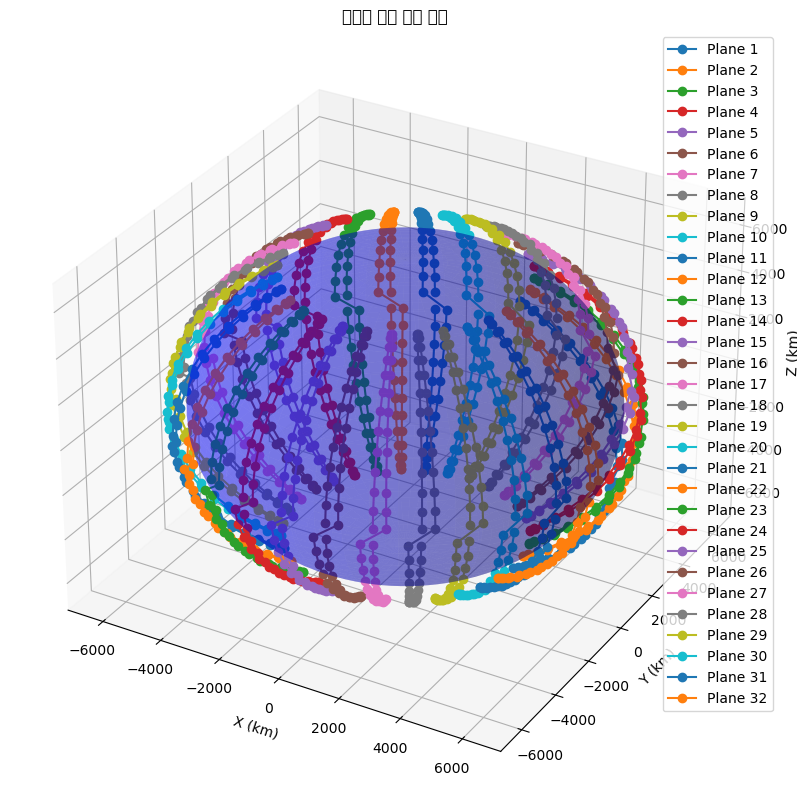

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 입력 변수
total_satellites = int(input("전체 위성 수를 입력하세요: "))
num_planes = int(input("궤도 평면의 수를 입력하세요: "))
altitude = float(input("위성의 고도(km)를 입력하세요: "))
inclination = float(input("궤도 경사각(도)을 입력하세요: "))

# 지구 반지름 (km)
earth_radius = 6371

# 각 궤도 평면에 배치될 위성 수 계산
satellites_per_plane = total_satellites // num_planes
remaining_satellites = total_satellites % num_planes

# 각 궤도 평면의 오른경각(RAAN) 계산
raan_list = np.linspace(0, 360, num_planes, endpoint=False)

# 결과를 저장할 리스트
satellite_data = []

for i, raan in enumerate(raan_list):
    # 이 평면에 배치될 위성 수
    num_satellites_in_plane = satellites_per_plane + (1 if i < remaining_satellites else 0)
    
    # 위성들의 궤도 위치 (0~360도 사이), 각도를 균등하게 분포시킴
    anomalies = np.linspace(0, 360, num_satellites_in_plane, endpoint=False)
    
    for anomaly in anomalies:
        # 위도 계산
        latitude = np.arcsin(np.sin(np.radians(inclination)) * np.sin(np.radians(anomaly)))
        latitude_deg = np.degrees(latitude)
        
        # 경도 계산
        longitude = raan + np.arctan2(
            np.cos(np.radians(inclination)) * np.sin(np.radians(anomaly)),
            np.cos(np.radians(anomaly))
        )
        longitude_deg = (longitude + 360) % 360  # 0~360도 사이로 조정
        
        # 위성과 지구 중심까지의 거리 (반지름)
        radius = earth_radius + altitude
        
        # 구면 좌표를 카르테시안 좌표로 변환
        x = radius * np.cos(np.radians(latitude_deg)) * np.cos(np.radians(longitude_deg))
        y = radius * np.cos(np.radians(latitude_deg)) * np.sin(np.radians(longitude_deg))
        z = radius * np.sin(np.radians(latitude_deg))
        
        satellite_data.append({
            '위도': latitude_deg,
            '경도': longitude_deg,
            '궤도 평면 번호': i+1,
            'X': x,
            'Y': y,
            'Z': z,
            'Anomaly': anomaly  # 추가: 위성을 연결하기 위해 필요
        })

# 데이터프레임으로 결과 저장
df = pd.DataFrame(satellite_data)
print(df[['위도', '경도', '궤도 평면 번호']])

# 3D 시각화
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 지구 그리기
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
earth_x = earth_radius * np.outer(np.cos(u), np.sin(v))
earth_y = earth_radius * np.outer(np.sin(u), np.sin(v))
earth_z = earth_radius * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(earth_x, earth_y, earth_z, color='b', alpha=0.3)

# 각 궤도 평면의 위성을 선으로 연결하여 그리기
for plane_num in df['궤도 평면 번호'].unique():
    plane_data = df[df['궤도 평면 번호'] == plane_num]
    # Anomaly 기준으로 정렬
    plane_data = plane_data.sort_values(by='Anomaly')
    ax.plot(plane_data['X'], plane_data['Y'], plane_data['Z'], marker='o', label=f'Plane {int(plane_num)}')

# 축 설정
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title('저궤도 군집 위성 배치')

# 축의 범위 설정
max_range = np.array([df['X'].max()-df['X'].min(), df['Y'].max()-df['Y'].min(), df['Z'].max()-df['Z'].min()]).max() / 2.0
mid_x = (df['X'].max()+df['X'].min()) * 0.5
mid_y = (df['Y'].max()+df['Y'].min()) * 0.5
mid_z = (df['Z'].max()+df['Z'].min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

ax.legend()
plt.show()


전체 위성 수를 입력하세요:  1600
궤도 평면의 수를 입력하세요:  32
위성의 고도(km)를 입력하세요:  560
궤도 경사각(도)을 입력하세요:  58


             위도          경도  궤도 평면 번호
0      0.000000    0.000000         1
1      6.101414    3.829915         1
2     12.175158    7.748094         1
3     18.191098   11.849346         1
4     24.113799   16.242192         1
...         ...         ...       ...
1595 -29.898838  327.692851        32
1596 -24.113799  332.507808        32
1597 -18.191098  336.900654        32
1598 -12.175158  341.001906        32
1599  -6.101414  344.920085        32

[1600 rows x 3 columns]


C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44452 (\N{HANGUL SYLLABLE GWE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-pack

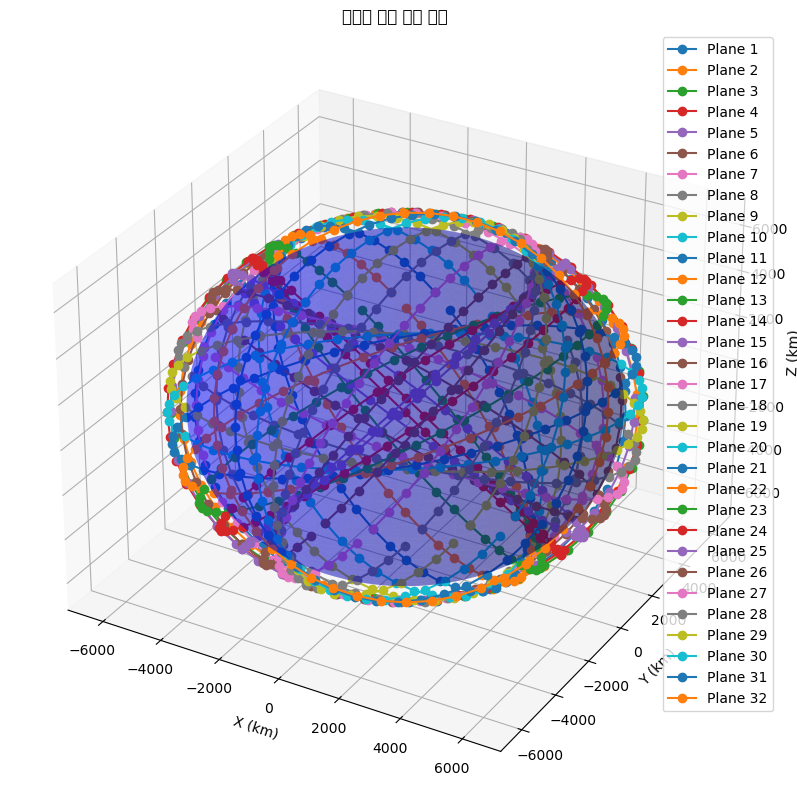

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 입력 변수
total_satellites = int(input("전체 위성 수를 입력하세요: "))
num_planes = int(input("궤도 평면의 수를 입력하세요: "))
altitude = float(input("위성의 고도(km)를 입력하세요: "))
inclination = float(input("궤도 경사각(도)을 입력하세요: "))

# 지구 반지름 (km)
earth_radius = 6371

# 궤도 반지름 (지구 반지름 + 고도)
orbit_radius = earth_radius + altitude

# 각 궤도 평면에 배치될 위성 수 계산
satellites_per_plane = total_satellites // num_planes
remaining_satellites = total_satellites % num_planes

# 각 궤도 평면의 오른경각(RAAN) 계산
raan_list = np.linspace(0, 360, num_planes, endpoint=False)

# 결과를 저장할 리스트
satellite_data = []

for i, raan in enumerate(raan_list):
    # 이 평면에 배치될 위성 수
    num_satellites_in_plane = satellites_per_plane + (1 if i < remaining_satellites else 0)
    
    # 위성들의 진근점 이각(True Anomaly), 각도를 균등하게 분포시킴
    true_anomalies = np.linspace(0, 360, num_satellites_in_plane, endpoint=False)
    
    for true_anomaly in true_anomalies:
        # 궤도 요소 (각도 단위를 라디안으로 변환)
        i_rad = np.radians(inclination)
        raan_rad = np.radians(raan)
        arg_perigee_rad = 0  # 원형 궤도이므로 근지점 편각은 0으로 설정
        true_anomaly_rad = np.radians(true_anomaly)
        
        # 궤도 평면에서의 위치 벡터 (PQW 좌표계)
        x_pqw = orbit_radius * np.cos(true_anomaly_rad)
        y_pqw = orbit_radius * np.sin(true_anomaly_rad)
        z_pqw = 0
        
        # 회전 행렬 계산
        # 1. Ω만큼 z축 회전 (RAAN)
        R1 = np.array([
            [np.cos(raan_rad), -np.sin(raan_rad), 0],
            [np.sin(raan_rad), np.cos(raan_rad), 0],
            [0, 0, 1]
        ])
        
        # 2. i만큼 x축 회전 (경사각)
        R2 = np.array([
            [1, 0, 0],
            [0, np.cos(i_rad), -np.sin(i_rad)],
            [0, np.sin(i_rad), np.cos(i_rad)]
        ])
        
        # 3. ω만큼 z축 회전 (근지점 편각), 여기서는 0이므로 생략 가능하지만 일반성을 위해 포함
        R3 = np.array([
            [np.cos(arg_perigee_rad), -np.sin(arg_perigee_rad), 0],
            [np.sin(arg_perigee_rad), np.cos(arg_perigee_rad), 0],
            [0, 0, 1]
        ])
        
        # 전체 회전 행렬
        R = R1 @ R2 @ R3
        
        # PQW 좌표계를 ECI 좌표계로 변환
        r_eci = R @ np.array([x_pqw, y_pqw, z_pqw])
        x_eci, y_eci, z_eci = r_eci
        
        satellite_data.append({
            '위도': np.degrees(np.arcsin(z_eci / orbit_radius)),
            '경도': (np.degrees(np.arctan2(y_eci, x_eci)) + 360) % 360,
            '궤도 평면 번호': i+1,
            'X': x_eci,
            'Y': y_eci,
            'Z': z_eci,
            'True Anomaly': true_anomaly
        })

# 데이터프레임으로 결과 저장
df = pd.DataFrame(satellite_data)
print(df[['위도', '경도', '궤도 평면 번호']])

# 3D 시각화
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 지구 그리기
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
earth_x = earth_radius * np.outer(np.cos(u), np.sin(v))
earth_y = earth_radius * np.outer(np.sin(u), np.sin(v))
earth_z = earth_radius * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(earth_x, earth_y, earth_z, color='b', alpha=0.3)

# 각 궤도 평면의 위성을 선으로 연결하여 그리기
for plane_num in df['궤도 평면 번호'].unique():
    plane_data = df[df['궤도 평면 번호'] == plane_num]
    # True Anomaly 기준으로 정렬
    plane_data = plane_data.sort_values(by='True Anomaly')
    ax.plot(plane_data['X'], plane_data['Y'], plane_data['Z'], marker='o', label=f'Plane {int(plane_num)}')

# 축 설정
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title('저궤도 군집 위성 배치')

# 축의 범위 설정
max_range = np.array([df['X'].max()-df['X'].min(), df['Y'].max()-df['Y'].min(), df['Z'].max()-df['Z'].min()]).max() / 2.0
mid_x = (df['X'].max()+df['X'].min()) * 0.5
mid_y = (df['Y'].max()+df['Y'].min()) * 0.5
mid_z = (df['Z'].max()+df['Z'].min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

ax.legend()
plt.show()


전체 위성 수를 입력하세요 (T):  1600
궤도 평면의 수를 입력하세요 (P):  32
위상 파라미터를 입력하세요 (F, 0 ≤ F < P):  1
위성의 고도(km)를 입력하세요:  560
궤도 경사각(도)을 입력하세요:  58


             위도          경도  궤도 평면 번호
0      0.000000    0.000000         1
1      6.101414    3.829915         1
2     12.175158    7.748094         1
3     18.191098   11.849346         1
4     24.113799   16.242192         1
...         ...         ...       ...
1595 -24.296927  332.364481        32
1596 -18.377798  336.768405        32
1597 -12.364198  340.877035        32
1598  -6.291785  344.799447        32
1599  -0.190811  348.630768        32

[1600 rows x 3 columns]


C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-packag

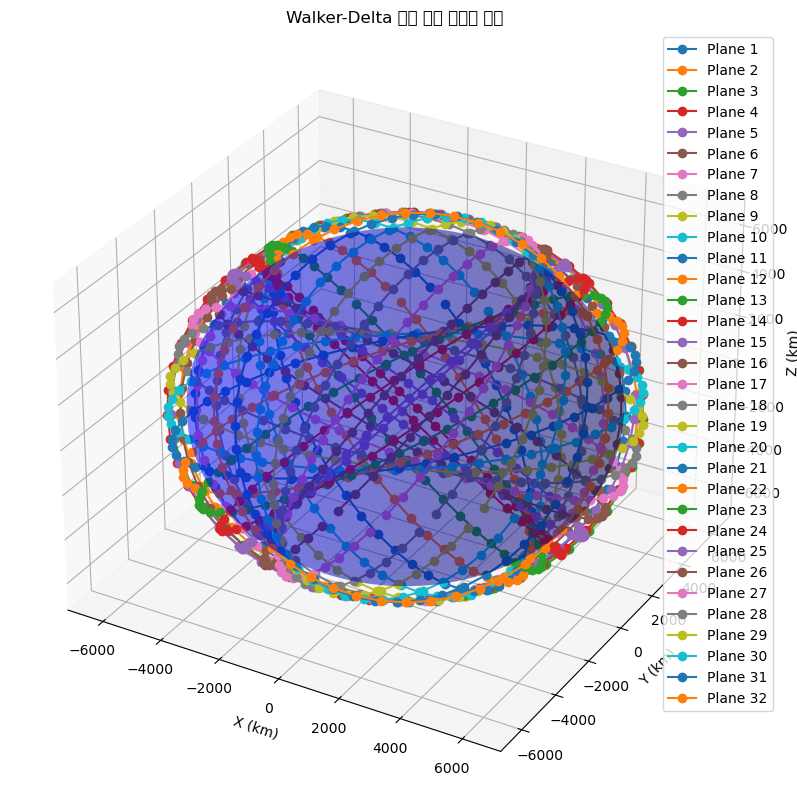

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 입력 변수
total_satellites = int(input("전체 위성 수를 입력하세요 (T): "))
num_planes = int(input("궤도 평면의 수를 입력하세요 (P): "))
phasing = int(input("위상 파라미터를 입력하세요 (F, 0 ≤ F < P): "))
altitude = float(input("위성의 고도(km)를 입력하세요: "))
inclination = float(input("궤도 경사각(도)을 입력하세요: "))

# 지구 반지름 (km)
earth_radius = 6371

# 궤도 반지름 (지구 반지름 + 고도)
orbit_radius = earth_radius + altitude

# 궤도 평면당 위성 수 (S)
satellites_per_plane = total_satellites // num_planes

# 검증
if total_satellites % num_planes != 0:
    print("총 위성 수는 궤도 평면 수로 나누어 떨어져야 합니다.")
    exit()

if not (0 <= phasing < num_planes):
    print("위상 파라미터 F는 0 이상 궤도 평면 수 미만의 정수여야 합니다.")
    exit()

# 각 궤도 평면의 RAAN 계산
raan_list = np.array([i * 360 / num_planes for i in range(num_planes)])

# 결과를 저장할 리스트
satellite_data = []

for i in range(num_planes):
    RAAN = raan_list[i]
    for j in range(satellites_per_plane):
        # 위상 파라미터를 고려한 위성의 평균 근점 이각 또는 위상 계산
        mean_anomaly = (360 / satellites_per_plane) * j + (phasing * 360 / total_satellites) * i
        mean_anomaly = mean_anomaly % 360  # 0~360도 사이로 조정

        # 궤도 요소 (각도 단위를 라디안으로 변환)
        i_rad = np.radians(inclination)
        RAAN_rad = np.radians(RAAN)
        arg_perigee_rad = 0  # 원형 궤도이므로 근지점 편각은 0으로 설정
        true_anomaly_rad = np.radians(mean_anomaly)

        # 궤도 평면에서의 위치 벡터 (PQW 좌표계)
        x_pqw = orbit_radius * np.cos(true_anomaly_rad)
        y_pqw = orbit_radius * np.sin(true_anomaly_rad)
        z_pqw = 0

        # 회전 행렬 계산
        # 1. Ω만큼 z축 회전 (RAAN)
        R1 = np.array([
            [np.cos(RAAN_rad), -np.sin(RAAN_rad), 0],
            [np.sin(RAAN_rad), np.cos(RAAN_rad), 0],
            [0, 0, 1]
        ])

        # 2. i만큼 x축 회전 (경사각)
        R2 = np.array([
            [1, 0, 0],
            [0, np.cos(i_rad), -np.sin(i_rad)],
            [0, np.sin(i_rad), np.cos(i_rad)]
        ])

        # 3. ω만큼 z축 회전 (근지점 편각)
        R3 = np.array([
            [np.cos(arg_perigee_rad), -np.sin(arg_perigee_rad), 0],
            [np.sin(arg_perigee_rad), np.cos(arg_perigee_rad), 0],
            [0, 0, 1]
        ])

        # 전체 회전 행렬
        R = R1 @ R2 @ R3

        # PQW 좌표계를 ECI 좌표계로 변환
        r_eci = R @ np.array([x_pqw, y_pqw, z_pqw])
        x_eci, y_eci, z_eci = r_eci

        satellite_data.append({
            '위도': np.degrees(np.arcsin(z_eci / orbit_radius)),
            '경도': (np.degrees(np.arctan2(y_eci, x_eci)) + 360) % 360,
            '궤도 평면 번호': i+1,
            'X': x_eci,
            'Y': y_eci,
            'Z': z_eci,
            'Mean Anomaly': mean_anomaly
        })

# 데이터프레임으로 결과 저장
df = pd.DataFrame(satellite_data)
print(df[['위도', '경도', '궤도 평면 번호']])

# 3D 시각화
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 지구 그리기
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
earth_x = earth_radius * np.outer(np.cos(u), np.sin(v))
earth_y = earth_radius * np.outer(np.sin(u), np.sin(v))
earth_z = earth_radius * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(earth_x, earth_y, earth_z, color='b', alpha=0.3)

# 각 궤도 평면의 위성을 선으로 연결하여 그리기
for plane_num in df['궤도 평면 번호'].unique():
    plane_data = df[df['궤도 평면 번호'] == plane_num]
    # Mean Anomaly 기준으로 정렬
    plane_data = plane_data.sort_values(by='Mean Anomaly')
    ax.plot(plane_data['X'], plane_data['Y'], plane_data['Z'], marker='o', label=f'Plane {int(plane_num)}')

# 축 설정
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title('Walker-Delta 모델 기반 위성군 배치')

# 축의 범위 설정
max_range = np.array([df['X'].max()-df['X'].min(), df['Y'].max()-df['Y'].min(), df['Z'].max()-df['Z'].min()]).max() / 2.0
mid_x = (df['X'].max()+df['X'].min()) * 0.5
mid_y = (df['Y'].max()+df['Y'].min()) * 0.5
mid_z = (df['Z'].max()+df['Z'].min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

ax.legend()
plt.show()


전체 위성 수를 입력하세요 (T):  1600
궤도 평면의 수를 입력하세요 (P):  32
위상 파라미터를 입력하세요 (F, 0 ≤ F < P):  1
위성의 고도(km)를 입력하세요:  560
궤도 경사각(도)을 입력하세요:  58
총 시뮬레이션 시간(s)을 입력하세요:  7200
시간 간격(s)을 입력하세요:  30


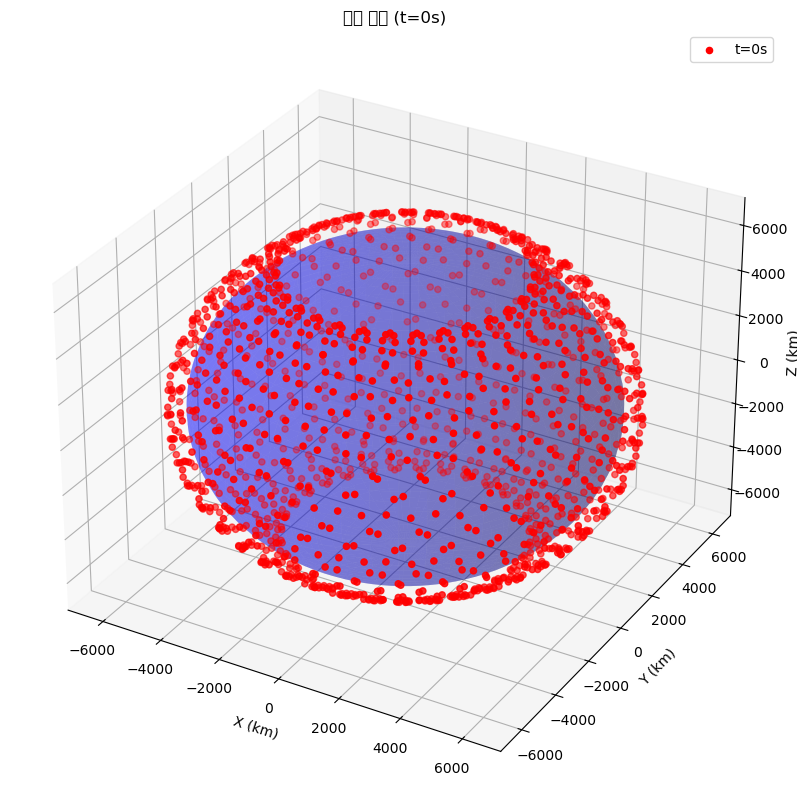

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 물리 상수
MU_EARTH = 3.986004418e5  # 지구 중력상수 (km^3/s^2)

# 입력 변수
total_satellites = int(input("전체 위성 수를 입력하세요 (T): "))
num_planes = int(input("궤도 평면의 수를 입력하세요 (P): "))
phasing = int(input("위상 파라미터를 입력하세요 (F, 0 ≤ F < P): "))
altitude = float(input("위성의 고도(km)를 입력하세요: "))
inclination = float(input("궤도 경사각(도)을 입력하세요: "))
t_total = float(input("총 시뮬레이션 시간(s)을 입력하세요: "))
dt = float(input("시간 간격(s)을 입력하세요: "))

# 지구 반지름 (km)
earth_radius = 6371

# 궤도 반지름 (지구 반지름 + 고도)
orbit_radius = earth_radius + altitude

# 궤도 주기 계산 (초)
orbital_period = 2 * np.pi * np.sqrt(orbit_radius**3 / MU_EARTH)

# 평균 운동 (rad/s)
mean_motion = 2 * np.pi / orbital_period  # rad/s

# 궤도 평면당 위성 수 (S)
satellites_per_plane = total_satellites // num_planes

# 검증
if total_satellites % num_planes != 0:
    print("총 위성 수는 궤도 평면 수로 나누어 떨어져야 합니다.")
    exit()

if not (0 <= phasing < num_planes):
    print("위상 파라미터 F는 0 이상 궤도 평면 수 미만의 정수여야 합니다.")
    exit()

# 각 궤도 평면의 RAAN 계산
raan_list = np.array([i * 360 / num_planes for i in range(num_planes)])

# 시간 설정
time_steps = np.arange(0, t_total + dt, dt)  # 시뮬레이션 시간 단계

# 결과를 저장할 리스트
all_time_data = []

for t in time_steps:
    satellite_data = []
    for i in range(num_planes):
        RAAN = raan_list[i]
        for j in range(satellites_per_plane):
            # 초기 진근점 이각 (t=0)
            initial_true_anomaly = (360 / satellites_per_plane) * j + (phasing * 360 / total_satellites) * i
            initial_true_anomaly = initial_true_anomaly % 360  # 0~360도 사이로 조정

            # 현재 시간에서의 진근점 이각 업데이트
            true_anomaly_rad = np.radians(initial_true_anomaly) + mean_motion * t  # 라디안 단위
            true_anomaly_rad = true_anomaly_rad % (2 * np.pi)  # 0~2π 사이로 조정

            # 궤도 요소 (각도 단위를 라디안으로 변환)
            i_rad = np.radians(inclination)
            RAAN_rad = np.radians(RAAN)
            arg_perigee_rad = 0  # 원형 궤도이므로 근지점 편각은 0으로 설정

            # 궤도 평면에서의 위치 벡터 (PQW 좌표계)
            x_pqw = orbit_radius * np.cos(true_anomaly_rad)
            y_pqw = orbit_radius * np.sin(true_anomaly_rad)
            z_pqw = 0

            # 회전 행렬 계산
            # 1. Ω만큼 z축 회전 (RAAN)
            R1 = np.array([
                [np.cos(RAAN_rad), -np.sin(RAAN_rad), 0],
                [np.sin(RAAN_rad), np.cos(RAAN_rad), 0],
                [0, 0, 1]
            ])

            # 2. i만큼 x축 회전 (경사각)
            R2 = np.array([
                [1, 0, 0],
                [0, np.cos(i_rad), -np.sin(i_rad)],
                [0, np.sin(i_rad), np.cos(i_rad)]
            ])

            # 3. ω만큼 z축 회전 (근지점 편각)
            R3 = np.array([
                [np.cos(arg_perigee_rad), -np.sin(arg_perigee_rad), 0],
                [np.sin(arg_perigee_rad), np.cos(arg_perigee_rad), 0],
                [0, 0, 1]
            ])

            # 전체 회전 행렬
            R = R1 @ R2 @ R3

            # PQW 좌표계를 ECI 좌표계로 변환
            r_eci = R @ np.array([x_pqw, y_pqw, z_pqw])
            x_eci, y_eci, z_eci = r_eci

            satellite_data.append({
                '시간(s)': t,
                '위성 번호': i * satellites_per_plane + j + 1,
                '궤도 평면 번호': i + 1,
                'X': x_eci,
                'Y': y_eci,
                'Z': z_eci
            })
    all_time_data.extend(satellite_data)

# 전체 데이터프레임 생성
df_all = pd.DataFrame(all_time_data)

# 데이터 저장 (예: CSV 파일로 저장)
df_all.to_csv('satellite_positions.csv', index=False)

# 예시: 특정 시간에서의 위성 위치 시각화 (t=0)
df_t0 = df_all[df_all['시간(s)'] == 0]

# 3D 시각화
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 지구 그리기
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
earth_x = earth_radius * np.outer(np.cos(u), np.sin(v))
earth_y = earth_radius * np.outer(np.sin(u), np.sin(v))
earth_z = earth_radius * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(earth_x, earth_y, earth_z, color='b', alpha=0.3)

# 위성 그리기 (t=0)
ax.scatter(df_t0['X'], df_t0['Y'], df_t0['Z'], c='r', marker='o', label='t=0s')

# 축 설정
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title('위성 위치 (t=0s)')

# 축의 범위 설정
max_range = np.array([df_t0['X'].max()-df_t0['X'].min(), df_t0['Y'].max()-df_t0['Y'].min(), df_t0['Z'].max()-df_t0['Z'].min()]).max() / 2.0
mid_x = (df_t0['X'].max()+df_t0['X'].min()) * 0.5
mid_y = (df_t0['Y'].max()+df_t0['Y'].min()) * 0.5
mid_z = (df_t0['Z'].max()+df_t0['Z'].min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

ax.legend()
plt.show()


전체 위성 수를 입력하세요 (T):  1600
궤도 평면의 수를 입력하세요 (P):  32
위상 파라미터를 입력하세요 (F, 0 ≤ F < P):  1
위성의 고도(km)를 입력하세요:  560
궤도 경사각(도)을 입력하세요:  58
총 시뮬레이션 시간(s)을 입력하세요:  7200
시간 간격(s)을 입력하세요:  30
시각화할 시간을 입력하세요 (s):  3600


C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


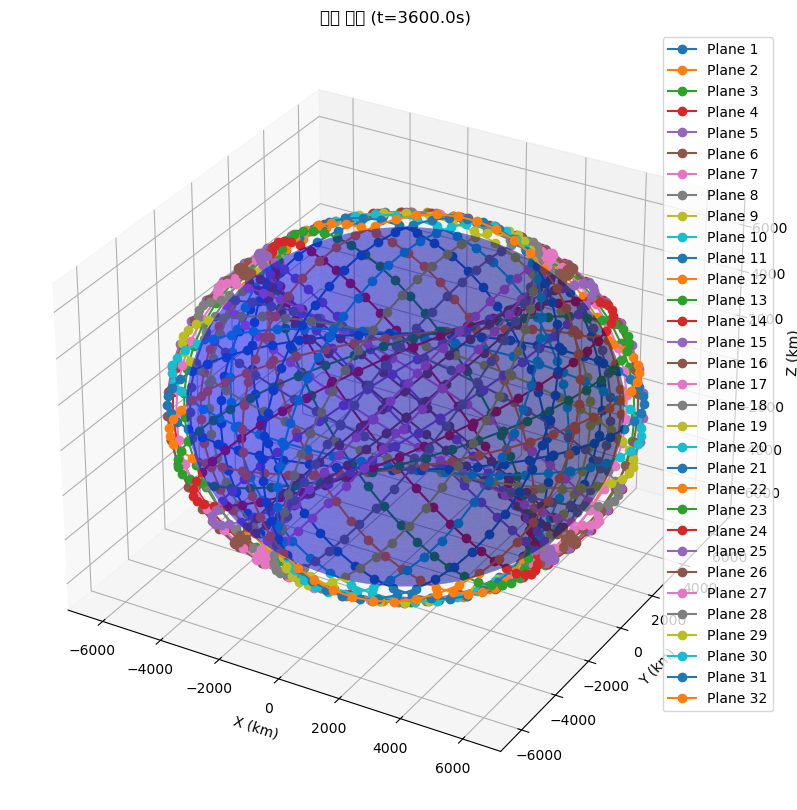

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

# 물리 상수
MU_EARTH = 3.986004418e5  # 지구 중력상수 (km^3/s^2)
OMEGA_EARTH = 7.2921159e-5  # 지구 자전 각속도 (rad/s)

# 입력 변수
total_satellites = int(input("전체 위성 수를 입력하세요 (T): "))
num_planes = int(input("궤도 평면의 수를 입력하세요 (P): "))
phasing = int(input("위상 파라미터를 입력하세요 (F, 0 ≤ F < P): "))
altitude = float(input("위성의 고도(km)를 입력하세요: "))
inclination = float(input("궤도 경사각(도)을 입력하세요: "))
t_total = float(input("총 시뮬레이션 시간(s)을 입력하세요: "))
dt = float(input("시간 간격(s)을 입력하세요: "))

# 지구 반지름 (km)
earth_radius = 6371

# 궤도 반지름 (지구 반지름 + 고도)
orbit_radius = earth_radius + altitude

# 궤도 주기 계산 (초)
orbital_period = 2 * np.pi * np.sqrt(orbit_radius**3 / MU_EARTH)

# 평균 운동 (rad/s)
mean_motion = 2 * np.pi / orbital_period  # rad/s

# 궤도 평면당 위성 수 (S)
satellites_per_plane = total_satellites // num_planes

# 검증
if total_satellites % num_planes != 0:
    print("총 위성 수는 궤도 평면 수로 나누어 떨어져야 합니다.")
    sys.exit()

if not (0 <= phasing < num_planes):
    print("위상 파라미터 F는 0 이상 궤도 평면 수 미만의 정수여야 합니다.")
    sys.exit()

# 각 궤도 평면의 RAAN 계산
raan_list = np.array([i * 360 / num_planes for i in range(num_planes)])

# 시간 설정
time_steps = np.arange(0, t_total + dt, dt)  # 시뮬레이션 시간 단계

# 결과를 저장할 리스트
all_time_data = []

for t in time_steps:
    satellite_data = []
    for i in range(num_planes):
        RAAN = raan_list[i]
        for j in range(satellites_per_plane):
            # 초기 진근점 이각 (t=0)
            initial_true_anomaly = (360 / satellites_per_plane) * j + (phasing * 360 / total_satellites) * i
            initial_true_anomaly = initial_true_anomaly % 360  # 0~360도 사이로 조정

            # 현재 시간에서의 진근점 이각 업데이트
            true_anomaly_rad = np.radians(initial_true_anomaly) + mean_motion * t  # 라디안 단위
            true_anomaly_rad = true_anomaly_rad % (2 * np.pi)  # 0~2π 사이로 조정

            # 궤도 요소 (각도 단위를 라디안으로 변환)
            i_rad = np.radians(inclination)
            RAAN_rad = np.radians(RAAN)
            arg_perigee_rad = 0  # 원형 궤도이므로 근지점 편각은 0으로 설정

            # 궤도 평면에서의 위치 벡터 (PQW 좌표계)
            x_pqw = orbit_radius * np.cos(true_anomaly_rad)
            y_pqw = orbit_radius * np.sin(true_anomaly_rad)
            z_pqw = 0

            # 회전 행렬 계산
            # 1. Ω만큼 z축 회전 (RAAN)
            R1 = np.array([
                [np.cos(RAAN_rad), -np.sin(RAAN_rad), 0],
                [np.sin(RAAN_rad), np.cos(RAAN_rad), 0],
                [0, 0, 1]
            ])

            # 2. i만큼 x축 회전 (경사각)
            R2 = np.array([
                [1, 0, 0],
                [0, np.cos(i_rad), -np.sin(i_rad)],
                [0, np.sin(i_rad), np.cos(i_rad)]
            ])

            # 3. ω만큼 z축 회전 (근지점 편각)
            R3 = np.array([
                [np.cos(arg_perigee_rad), -np.sin(arg_perigee_rad), 0],
                [np.sin(arg_perigee_rad), np.cos(arg_perigee_rad), 0],
                [0, 0, 1]
            ])

            # 전체 회전 행렬
            R = R1 @ R2 @ R3

            # PQW 좌표계를 ECI 좌표계로 변환
            r_eci = R @ np.array([x_pqw, y_pqw, z_pqw])
            x_eci, y_eci, z_eci = r_eci

            # 지구의 자전 각도 계산
            theta_g = OMEGA_EARTH * t  # 라디안 단위

            # ECI에서 ECEF로 변환 (지구 자전 고려)
            x_ecef = np.cos(theta_g) * x_eci + np.sin(theta_g) * y_eci
            y_ecef = -np.sin(theta_g) * x_eci + np.cos(theta_g) * y_eci
            z_ecef = z_eci

            # 위도와 경도 계산
            r_mag = np.sqrt(x_ecef**2 + y_ecef**2 + z_ecef**2)
            latitude = np.degrees(np.arcsin(z_ecef / r_mag))
            longitude = (np.degrees(np.arctan2(y_ecef, x_ecef)) + 360) % 360  # 0~360도로 조정

            satellite_data.append({
                '시간(s)': t,
                '위성 번호': i * satellites_per_plane + j + 1,
                '궤도 평면 번호': i + 1,
                '위성의 위도': latitude,
                '위성의 경도': longitude
            })
    all_time_data.extend(satellite_data)

# 전체 데이터프레임 생성
df_all = pd.DataFrame(all_time_data)

# 데이터 저장 (예: CSV 파일로 저장)
df_all.to_csv('satellite_positions.csv', index=False)

# 원하는 시간에서의 데이터 검색 예시
desired_time = float(input("시각화할 시간을 입력하세요 (s): "))
df_desired_time = df_all[df_all['시간(s)'] == desired_time]

# 데이터가 있는지 확인
if df_desired_time.empty:
    print(f"{desired_time}초에서의 데이터가 존재하지 않습니다.")
    sys.exit()

# 3D 시각화
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 지구 그리기
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
earth_x = earth_radius * np.outer(np.cos(u), np.sin(v))
earth_y = earth_radius * np.outer(np.sin(u), np.sin(v))
earth_z = earth_radius * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(earth_x, earth_y, earth_z, color='b', alpha=0.3)

# 위성 위치 계산
r = earth_radius + altitude
lat_rad = np.radians(df_desired_time['위성의 위도'])
lon_rad = np.radians(df_desired_time['위성의 경도'])
x_all = r * np.cos(lat_rad) * np.cos(lon_rad)
y_all = r * np.cos(lat_rad) * np.sin(lon_rad)
z_all = r * np.sin(lat_rad)

# 각 궤도 평면의 위성을 선으로 연결하여 그리기
for plane_num in df_desired_time['궤도 평면 번호'].unique():
    plane_data = df_desired_time[df_desired_time['궤도 평면 번호'] == plane_num]
    # 위도와 경도를 라디안으로 변환
    lat_rad = np.radians(plane_data['위성의 위도'])
    lon_rad = np.radians(plane_data['위성의 경도'])

    # 위성의 위치 계산 (고도 포함)
    x = r * np.cos(lat_rad) * np.cos(lon_rad)
    y = r * np.cos(lat_rad) * np.sin(lon_rad)
    z = r * np.sin(lat_rad)

    # 궤도를 폐합하기 위해 첫 번째 점을 다시 추가
    x = np.append(x.values, x.values[0])
    y = np.append(y.values, y.values[0])
    z = np.append(z.values, z.values[0])

    # 선으로 연결하여 궤도 평면 표시
    ax.plot(x, y, z, marker='o', label=f'Plane {int(plane_num)}')

# 축 설정
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title(f'위성 위치 (t={desired_time}s)')

# 축의 범위 설정
max_range = np.array([x_all.max()-x_all.min(), y_all.max()-y_all.min(), z_all.max()-z_all.min()]).max() / 2.0
mid_x = (x_all.max()+x_all.min()) * 0.5
mid_y = (y_all.max()+y_all.min()) * 0.5
mid_z = (z_all.max()+z_all.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

ax.legend()
plt.show()


In [14]:
# 특정 시간에서의 모든 위성 위치
desired_time = 3600  # 원하는 시간 (초)
df_desired_time = df_all[df_all['시간(s)'] == desired_time]
print(df_desired_time)

# 특정 위성의 시간에 따른 위치
satellite_number = 5  # 위성 번호


         시간(s)  위성 번호  궤도 평면 번호     위성의 위도      위성의 경도
192000  3600.0      1         1 -37.356550  193.448468
192001  3600.0      2         1 -42.550819  199.961118
192002  3600.0      3         1 -47.311421  207.602486
192003  3600.0      4         1 -51.468287  216.649705
192004  3600.0      5         1 -54.799555  227.308342
...        ...    ...       ...        ...         ...
193595  3600.0   1596        32 -14.070157  162.719136
193596  3600.0   1597        32 -20.061003  166.899321
193597  3600.0   1598        32 -25.945845  171.409251
193598  3600.0   1599        32 -31.676486  176.388249
193599  3600.0   1600        32 -37.188696  182.010179

[1600 rows x 5 columns]


NameError: name 'df_satellite' is not defined

In [20]:
print(all_time_data[3600])
print(len(all_time_data))

{'시간(s)': 60.0, '위성 번호': 401, '궤도 평면 번호': 9, '위성의 위도': 4.714245247155455, '위성의 경도': 92.70307665056947}
385600
